### 확률적 경사 하강법 (SGD : Stochastic Gradient Descent)
- 머신러닝에서도 많이 사용하지만 실질적으로 딥러닝에서 많이 사용한다. <br><br>
- 새로운 데이터가 추가 되더라도 로직을 바꾸지 않고 사용할 수 있게 하는 것이 확률적 경사 하강법이다. <br><br>
- 처리 과정 <br><br>
    1. 새로운 데이터로 모델을 추가하여 새롭게 학습하여 처리한다. <br><br>
    2. 추가된 갯수만큼 기존의 데이터를 버리고 사용한다. <br><br>
    3. 기존 모델을 수정하면서 사용한다. (점진적 학습 방법) <br><br>

- Epoch : 훈련세트를 다 사용했을 경우의 단계 <br><br>
- mini batch : 경사하강법 중 mini batch의 갯수를 정해야 된다. (보통 2의 배수로 많이 쓴다.) <br><br>

### 손실함수
- 머신러닝 알고리즘이 에러율을 측정하는 함수 <br><br>
- 손실함수 값이 적은 것이 정확도가 높은 것 <br><br>

In [63]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import pandas as pd

fish = pd.read_csv('../Data/fishes.csv')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [3]:
# Feature & target
fish_input = fish.iloc[:,1:].to_numpy()
fish_target = fish.Species.values

In [5]:
# Train , Test
from sklearn.model_selection import train_test_split

train_input , test_input, train_target, test_target = \
    train_test_split(fish_input, fish_target, random_state=42)

In [6]:
# 표준화
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit(train_input)
train_scaled=ss.transform(train_input)
test_scaled= ss.transform(test_input)

In [7]:
# 확률적 경사하강법의 분류 알고리즘 적용
from sklearn.linear_model import SGDClassifier

In [70]:
sc=SGDClassifier(
    loss='log', # 손실함수로 로지스틱 회귀를 사용한다. 
    max_iter=10
)

In [71]:
sc.fit(train_scaled,train_target)

SGDClassifier(loss='log', max_iter=10)

In [72]:
print('train score : ',sc.score(train_scaled,train_target))
print('test score : ',sc.score(test_scaled,test_target))

train score :  0.8907563025210085
test score :  0.925


> score가 별로 안 좋고, 과소적합 된다. 

In [73]:
sc.partial_fit(train_scaled , train_target)
print('train score : ',sc.score(train_scaled,train_target))
print('test score : ',sc.score(test_scaled,test_target))

train score :  0.8571428571428571
test score :  0.875


---
### Epoch와 과대 / 과소 적합
- 규제 값이 작아지면 과대적합이 된다.
- 조기 종료 (Early Stopping) : 적합한 Epoch의 위치를 찾으면 종료한다.

In [77]:
import numpy as np

sc = SGDClassifier(
    loss='log',
    random_state=42
)

train_score = []
test_score = []

classes = np.unique(train_target)
classes

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [78]:
for _ in range(300):
    sc.partial_fit(train_scaled,train_target, classes = classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled,test_target))

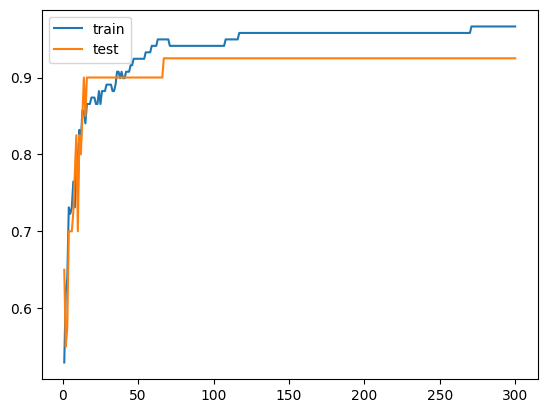

In [80]:
# 그래프로 보기
import matplotlib.pyplot as plt

plt.plot(
    np.arange(1,301),
    train_score,
    label = 'train'
)

plt.plot(
    np.arange(1,301),
    test_score,
    label = 'test'
)

plt.legend()

plt.show()

> ### 100정도의 Epoch가 좋은 것 같다. 

In [81]:
# 새롭게
sc = SGDClassifier(loss='log',max_iter=100,random_state=42,tol=None)
# tol = None : 조기종료 시점 현재은 정지기준이 없고, 반복 기간동안의 최적의 손실값보다 큰 경우 조기종료 한다. 
sc.fit(train_scaled, train_target)

print('train score : ',sc.score(train_scaled,train_target))
print('test score : ',sc.score(test_scaled,test_target))


train score :  0.957983193277311
test score :  0.925


### 조기 종료 값을 줘서 해보자잇!
- tol = 1.0e-3 으로 썼다는 것의 말은 전에 값보다 차이값이 0.001 만큼 차이나면 종료 한다는 말

In [98]:
# 조기 종료 시점 적용
sc = SGDClassifier(loss='log',max_iter=100,random_state=42,tol=0.0001)
# tol = None : 조기종료 시점 현재은 정지기준이 없고, 반복 기간동안의 최적의 손실값보다 큰 경우 조기종료 한다. 
sc.fit(train_scaled, train_target)

print('train score : ',sc.score(train_scaled,train_target))
print('test score : ',sc.score(test_scaled,test_target))

train score :  0.8403361344537815
test score :  0.8


---
### SVM을 이용하는 확률적 경사 하강법

In [96]:
# 조기종료가 없는 경우
sc = SGDClassifier(loss='hinge',max_iter=100,random_state=42,tol=None)
# tol = None : 조기종료 시점 현재은 정지기준이 없고, 반복 기간동안의 최적의 손실값보다 큰 경우 조기종료 한다. 
sc.fit(train_scaled, train_target)

print('train score : ',sc.score(train_scaled,train_target))
print('test score : ',sc.score(test_scaled,test_target))

train score :  0.9495798319327731
test score :  0.925


In [99]:
# 조기종료가 있는 경우
sc = SGDClassifier(loss='hinge',max_iter=100,random_state=42,tol=0.0001)
# tol = None : 조기종료 시점 현재은 정지기준이 없고, 반복 기간동안의 최적의 손실값보다 큰 경우 조기종료 한다. 
sc.fit(train_scaled, train_target)

print('train score : ',sc.score(train_scaled,train_target))
print('test score : ',sc.score(test_scaled,test_target))

train score :  0.907563025210084
test score :  0.925
